<a href="https://colab.research.google.com/github/TamizharasanG/KNN-and-K-Means-Practice/blob/main/K_Means_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Based on Income**

In [1]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_raw = pd.read_csv("https://github.com/codebasics/py/raw/master/ML/13_kmeans/income.csv")

In [3]:
data = data_raw.copy()

In [4]:
data.shape

(22, 3)

In [5]:
data.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

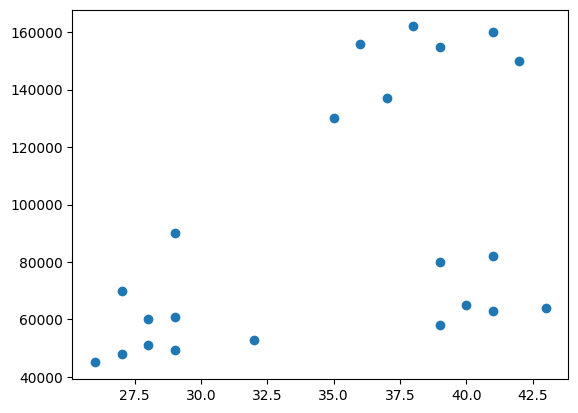

In [6]:
plt.scatter(data["Age"], data["Income($)"])

In [7]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [8]:
y_pred = km.fit_predict(data[["Age", "Income($)"]])
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [9]:
km.predict([[25, 50000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [10]:
data["Clusters"] = y_pred

In [11]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

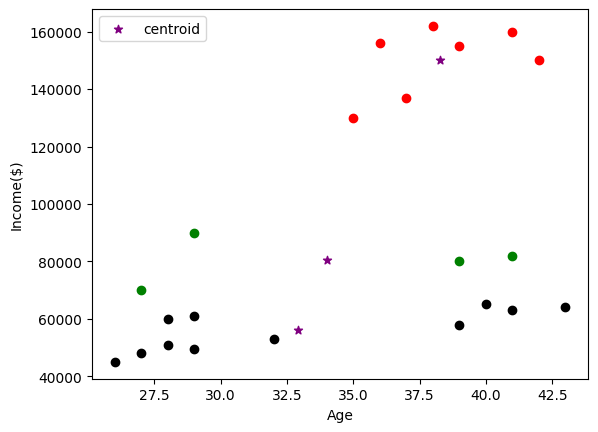

In [12]:
df_1= data[data["Clusters"] == 0]
df_2 = data[data["Clusters"] == 1]
df_3 = data[data["Clusters"] == 2]

plt.scatter(df_1["Age"], df_1["Income($)"], color = "green")
plt.scatter(df_2["Age"], df_2["Income($)"], color = "red")
plt.scatter(df_3["Age"], df_3["Income($)"], color = "black")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = "purple", marker = "*", label = "centroid")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

**After scaling results - MinMaxScaler**

In [13]:
data_raw.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [49]:
data_1 = data_raw.copy()

In [50]:
scaler = MinMaxScaler()

data_1["Income($)"] = scaler.fit_transform(np.array(data_1["Income($)"]).reshape(-1, 1))
data_1["Age"] = scaler.fit_transform(np.array(data_1["Age"]).reshape(-1, 1))

In [51]:
X = data_1.iloc[:,1: ]

In [52]:
km_m = KMeans(n_clusters = 3)
km_m

KMeans(n_clusters=3)

In [53]:
km_m.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [54]:
y_pred_2 = km_m.predict(X)

In [55]:
data_1.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [56]:
km_m.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [57]:
data_1["Clusters"] = y_pred_2

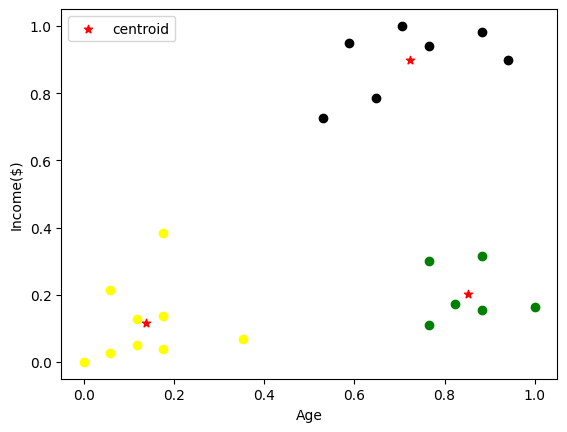

In [59]:
df1 = data_1[data_1["Clusters"] == 0]
df2 = data_1[data_1["Clusters"] == 1]
df3 = data_1[data_1["Clusters"] == 2]

plt.scatter(df1["Age"], df1["Income($)"], color = "green")
plt.scatter(df2["Age"], df2["Income($)"], color = "yellow")
plt.scatter(df3["Age"], df3["Income($)"], color = "black")
plt.scatter(km_m.cluster_centers_[:, 0], km_m.cluster_centers_[:, 1], color = "red", marker = "*", label = "centroid")


plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

**Standard scaled result**

In [23]:
data_raw.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [24]:
data_2 = data_raw.copy()

In [25]:
scaler = StandardScaler()

data_2["Income($)"] = scaler.fit_transform(np.array(data_2["Income($)"]).reshape(-1, 1))
data_2["Age"] = scaler.fit_transform(np.array(data_2["Age"]).reshape(-1, 1))

In [26]:
km_s = KMeans(n_clusters = 3)
km_s

KMeans(n_clusters=3)

In [27]:
X = data_2.iloc[:, 1:]

In [28]:
km_s.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [29]:
y_pred_2 = km_s.predict(X)

In [30]:
km_s.cluster_centers_

array([[-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261],
       [ 0.60143983,  1.40141653]])

In [31]:
data_2["Clusters"] = y_pred_2

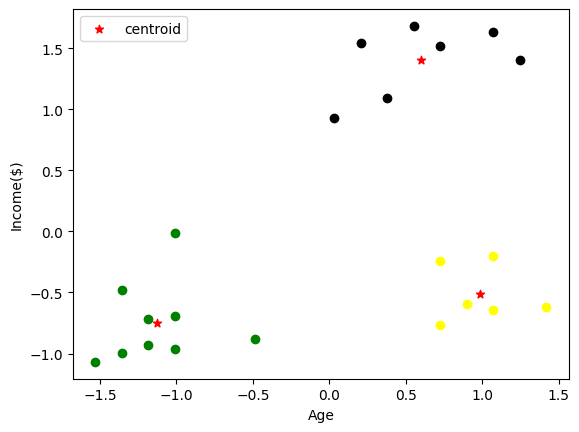

In [33]:

df11 = data_2[data_2["Clusters"] == 0]
df21 = data_2[data_2["Clusters"] == 1]
df31 = data_2[data_2["Clusters"] == 2]

plt.scatter(df11["Age"], df11["Income($)"], color = "green")
plt.scatter(df21["Age"], df21["Income($)"], color = "yellow")
plt.scatter(df31["Age"], df31["Income($)"], color = "black")
plt.scatter(km_s.cluster_centers_[:, 0], km_s.cluster_centers_[:, 1], color = "red", marker = "*", label = "centroid")


plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [34]:
k_range = []
sse = []
for i in range(1, 11):
  km = KMeans(n_clusters = i)
  k_range.append(i)
  km.fit(data_2.iloc[:, 1:])
  sse.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [35]:
sse

[59.8181818181818,
 19.425659505476002,
 3.8893086571301425,
 2.828763380093525,
 2.1690542993949644,
 1.7149245376922924,
 1.4373835320201054,
 1.1381423725542028,
 0.8688015679885144,
 0.6782961101271707]

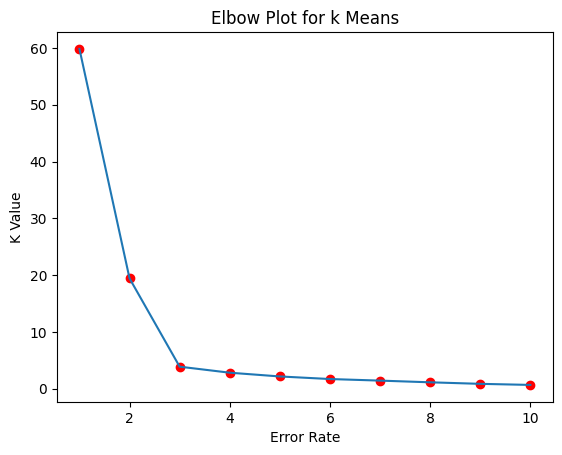

In [36]:
plt.plot(k_range, sse)
plt.ylabel("K Value")
plt.xlabel("Error Rate")
plt.title("Elbow Plot for k Means")
plt.scatter(k_range, sse, color = "red")